In [56]:
import pandas as pd
import numpy as np
from scipy.stats import gamma, norm
import matplotlib.pyplot as plt
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
from scipy.interpolate import griddata
from shapely.geometry import Polygon, Point

In [57]:
def func(file_path, SPI_Type = 1, start_date = "May-2015", end_date = "Jul-2022"):
    def preprocess_data(data):
        data = data[np.isfinite(data)]
        data[data == 0] = 1e-15
        return data

    def compute_gamma_parameters(data):
        shape, loc, scale = gamma.fit(data, floc=0)
        return shape, scale

    def compute_SPI(precipitation, shape, scale):
        cdf = gamma.cdf(precipitation, shape, loc=0, scale=scale)
        spi = norm.ppf(cdf) 
        return spi

    df = pd.read_csv(file_path)
    rainfall_data = df.iloc[:, 1].values
    dates = df['Dates'].values
    rainfall_data = np.convolve(rainfall_data, np.ones(SPI_Type)/SPI_Type, mode='valid')
    if(SPI_Type <= 12):
        processed_data = preprocess_data(rainfall_data)
        shape, scale = compute_gamma_parameters(processed_data)
        spi_values = compute_SPI(processed_data, shape, scale)
        start_idx = np.where(dates == start_date)[0][0]
        start_idx = start_idx - (SPI_Type-1)
        end_idx = np.where(dates == end_date)[0][0]
        end_idx = end_idx - (SPI_Type-1)
        spi_range = spi_values[start_idx:end_idx + 1]
        mask = (spi_range < 0)
        drought_freq = np.sum(mask)
        average_spi = np.mean(spi_range)
        print(f'Average SPI value from {start_date} to {end_date}: {average_spi:.2f}')
        spi_df = pd.DataFrame({'Date': dates[(SPI_Type-1):], 'SPI': spi_values})
        spi_df['Sign'] = ['Positive' if spi > 0 else 'Negative' for spi in spi_df['SPI']]
        plt.figure(figsize=(10, 6))
        plt.fill_between(spi_df['Date'], spi_df['SPI'], where=(spi_df['Sign'] == 'Positive'), color='blue', alpha=0.3, label='Positive SPI')
        plt.fill_between(spi_df['Date'], spi_df['SPI'], where=(spi_df['Sign'] == 'Negative'), color='red', alpha=0.3, label='Negative SPI')
        plt.plot(spi_df['Date'], spi_df['SPI'], color='black', label='SPI Line')
        plt.xlabel('Dates')
        plt.ylabel('SPI Values')
        plt.title('SPI Over Time')
        plt.xticks(rotation=45)
        plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
        plt.legend()
        plt.tight_layout()
        plt.show()
        return average_spi, spi_df, drought_freq


In [58]:
def format_date(start_month, start_year, end_month, end_year):
    """
    Format the input start and end months/years into 'Month-Year' format (e.g., 'Jan-2016').
    """
    # Define a mapping of month numbers to month names
    month_mapping = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
        5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }

    # Convert start and end months/years to formatted strings
    start_date = f"{month_mapping[start_month]}-{start_year}"
    end_date = f"{month_mapping[end_month]}-{end_year}"

    return start_date, end_date
start_month = int(input("Enter start month (1-12): "))
start_year = int(input("Enter start year: "))
end_month = int(input("Enter end month (1-12): "))
end_year = int(input("Enter end year: "))
start_date, end_date = format_date(start_month, start_year, end_month, end_year)
print(f"Formatted start date: {start_date}")
print(f"Formatted end date: {end_date}")
SPI_Type = int(input("Enter the SPI Type: "))

Enter start month (1-12): 4
Enter start year: 2016
Enter end month (1-12): 4
Enter end year: 2022
Formatted start date: Apr-2016
Formatted end date: Apr-2022
Enter the SPI Type: 3


In [60]:
average_spi_values = []
drought_frequencies = []

# Bahalpur

Average SPI value from Apr-2016 to Apr-2022: 0.27


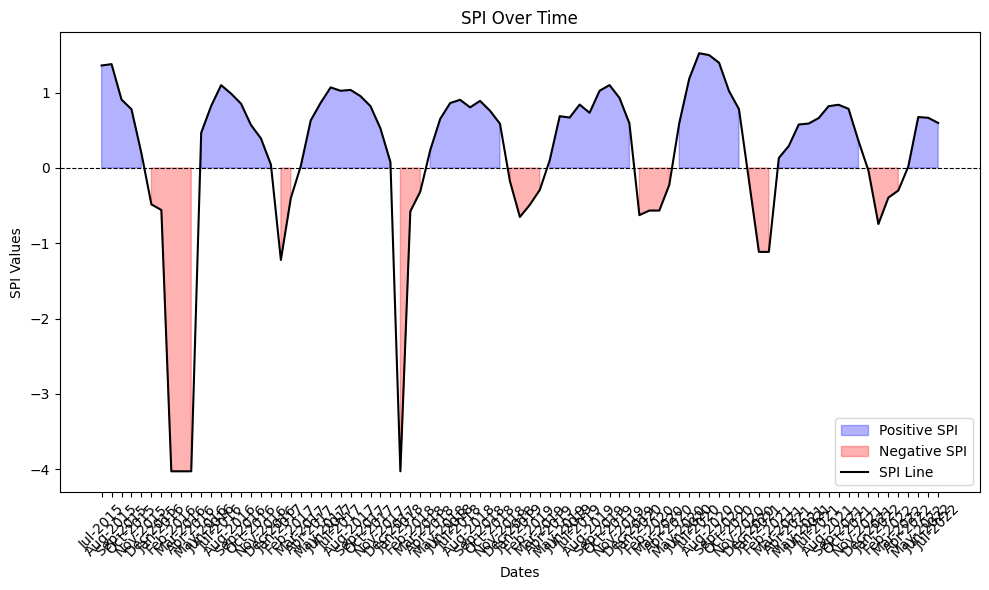

In [61]:
average_spi, spi_df, drought_freq = func('Bahalpur.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)
# print(drought_freq)
average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Bhalukpong

Average SPI value from Apr-2016 to Apr-2022: 0.39


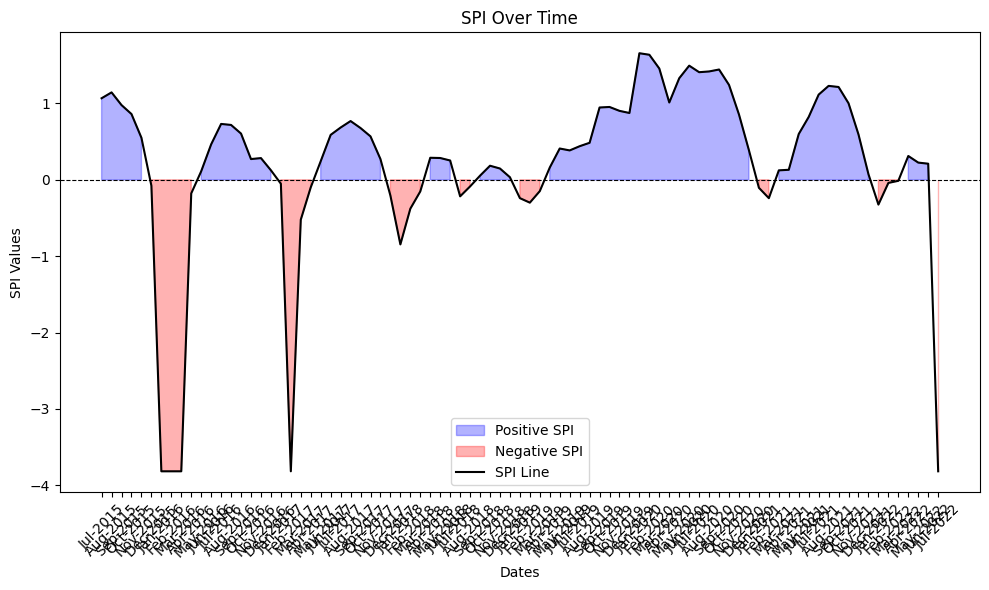

In [62]:
average_spi, spi_df, drought_freq = func('Bhalukpong.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Bihubar

Average SPI value from Apr-2016 to Apr-2022: 0.43


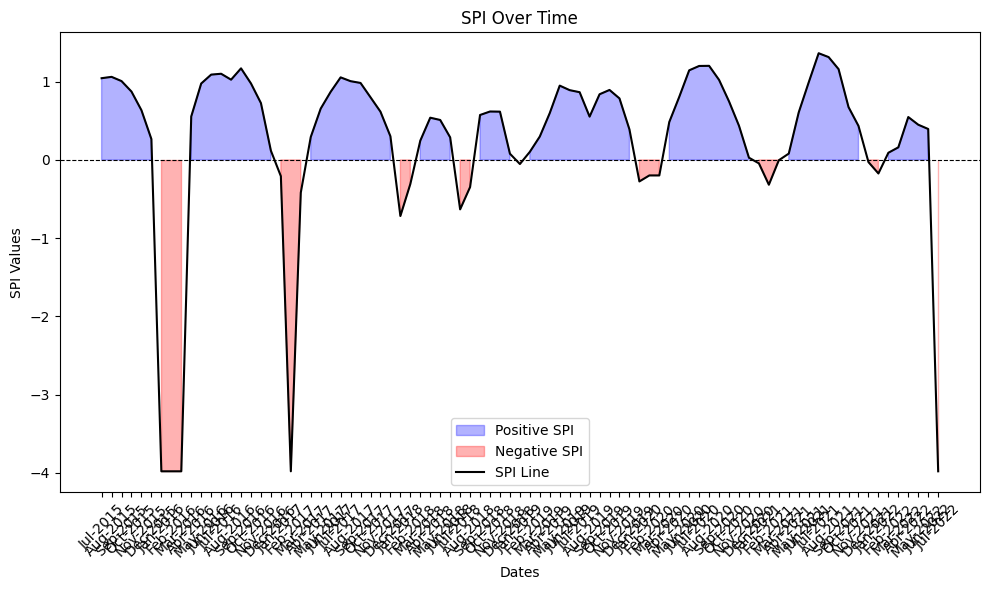

In [63]:
average_spi, spi_df, drought_freq = func('Bihubar.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Bokajan

Average SPI value from Apr-2016 to Apr-2022: 0.45


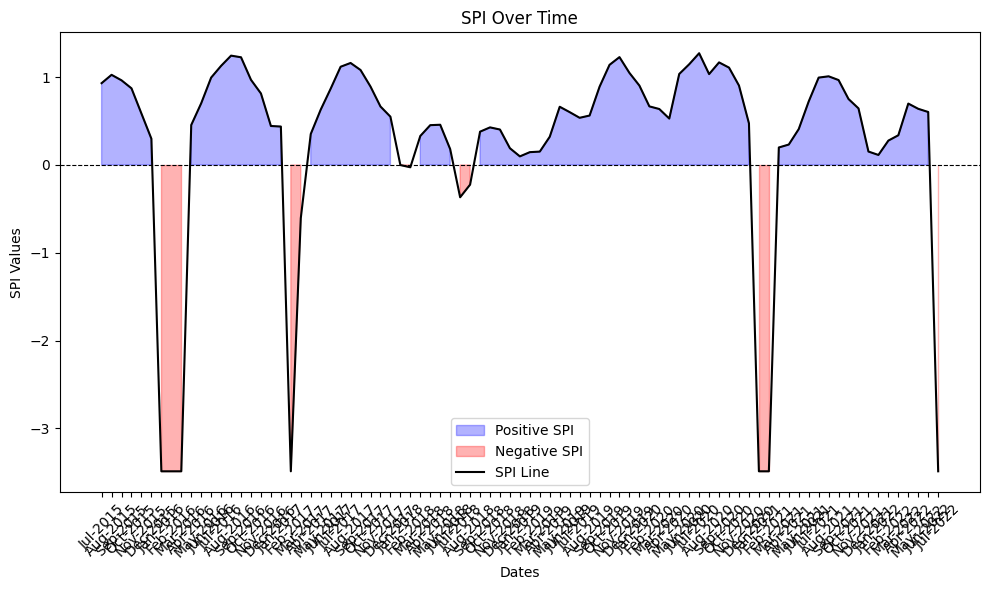

In [64]:
average_spi, spi_df, drought_freq = func('Bokajan.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Chouldhowaghat

Average SPI value from Apr-2016 to Apr-2022: 0.15


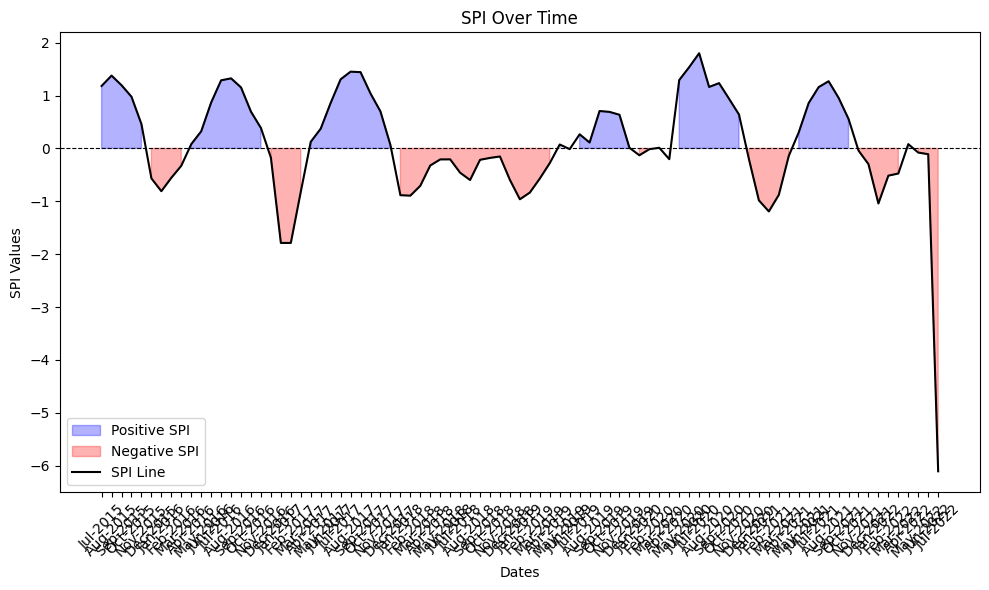

In [65]:
average_spi, spi_df, drought_freq = func('Chouldhowaghat.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Dharamtul

Average SPI value from Apr-2016 to Apr-2022: 0.36


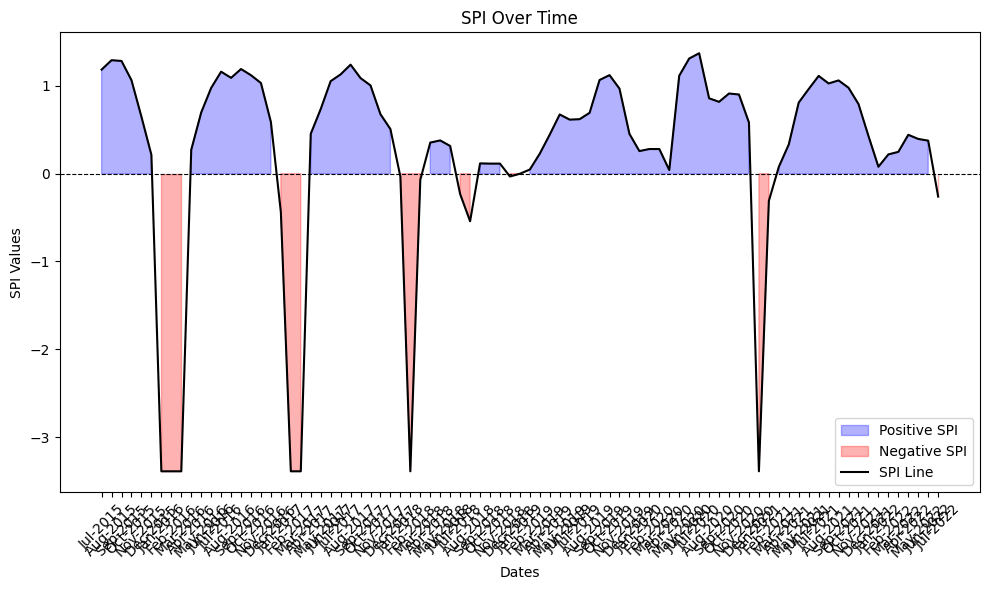

In [66]:
average_spi, spi_df, drought_freq = func('Dharamtul.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Dhubri

Average SPI value from Apr-2016 to Apr-2022: 0.31


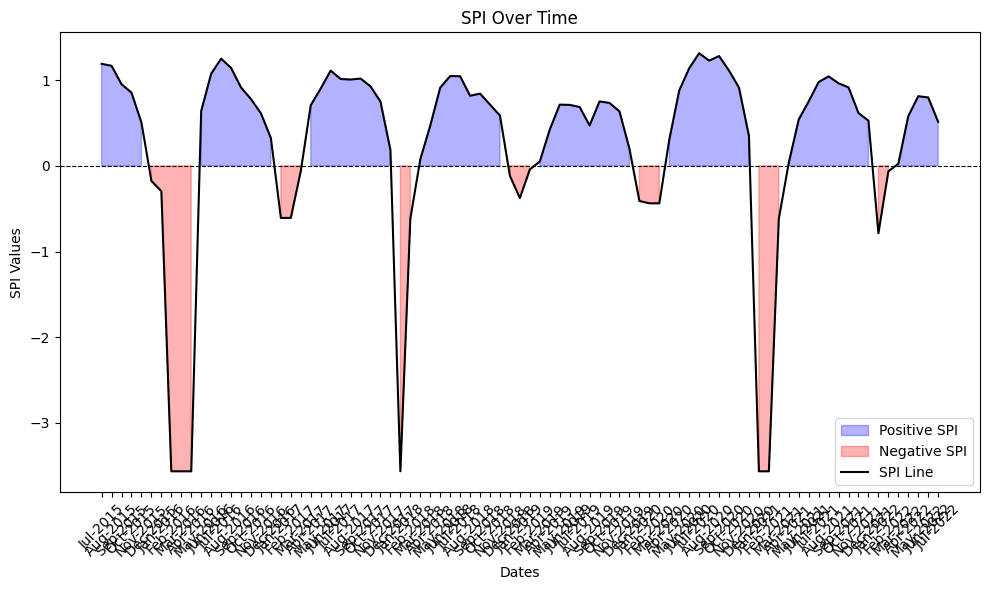

In [67]:
average_spi, spi_df, drought_freq = func('Dhubri.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Dibrugarh

Average SPI value from Apr-2016 to Apr-2022: 0.40


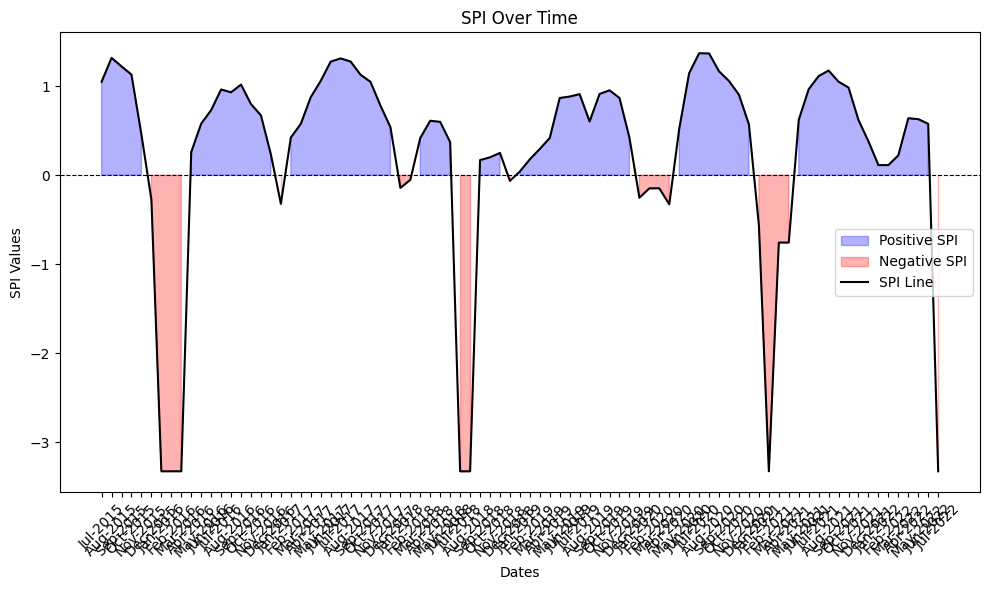

In [68]:
average_spi, spi_df, drought_freq = func('Dibrugarh.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Domohani

Average SPI value from Apr-2016 to Apr-2022: 0.35


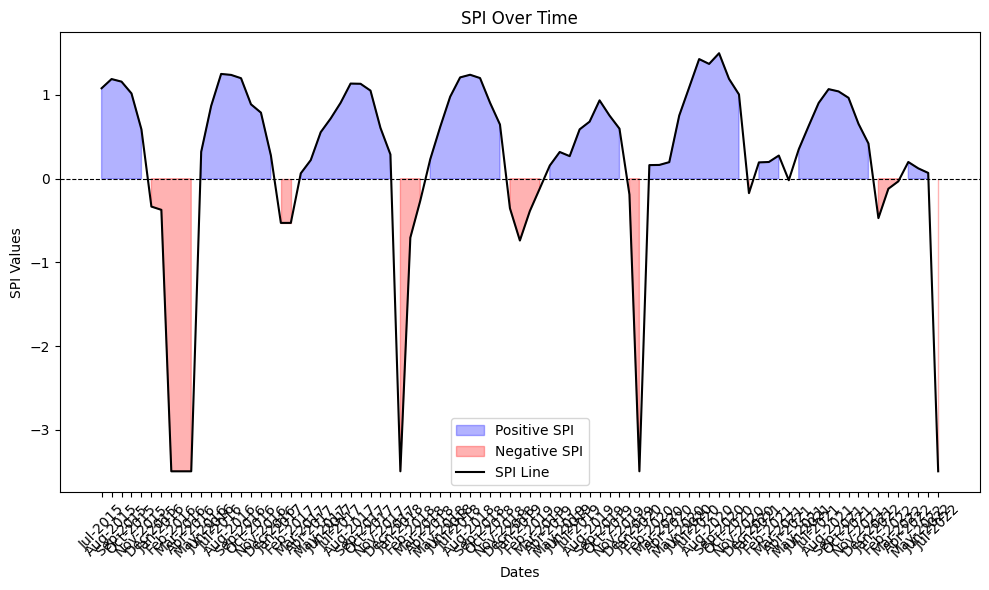

In [69]:
average_spi, spi_df, drought_freq = func('Domohani.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# DRF

Average SPI value from Apr-2016 to Apr-2022: 0.21


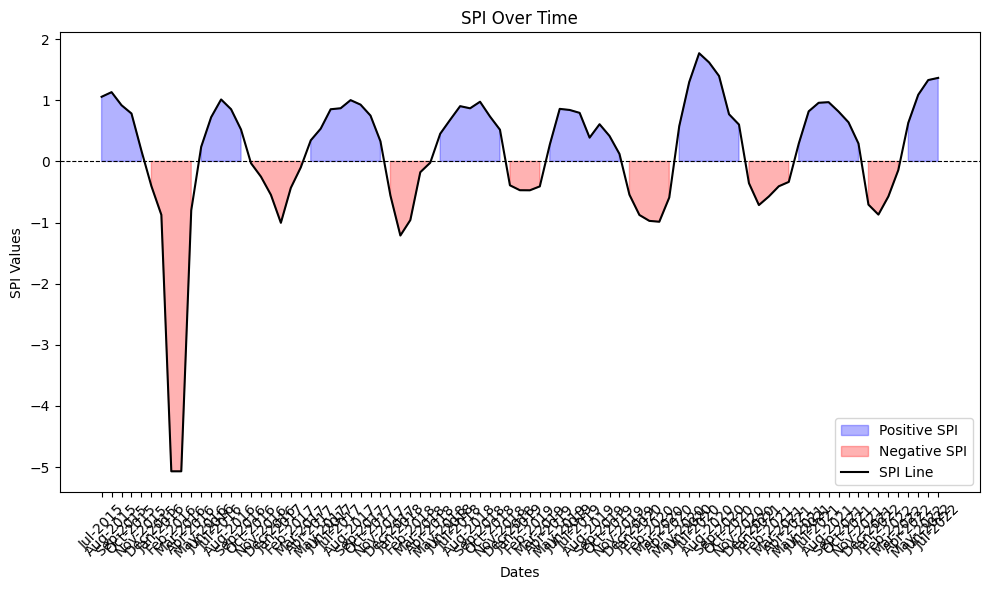

In [70]:
average_spi, spi_df, drought_freq = func('DRF.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Hasimara

Average SPI value from Apr-2016 to Apr-2022: 0.24


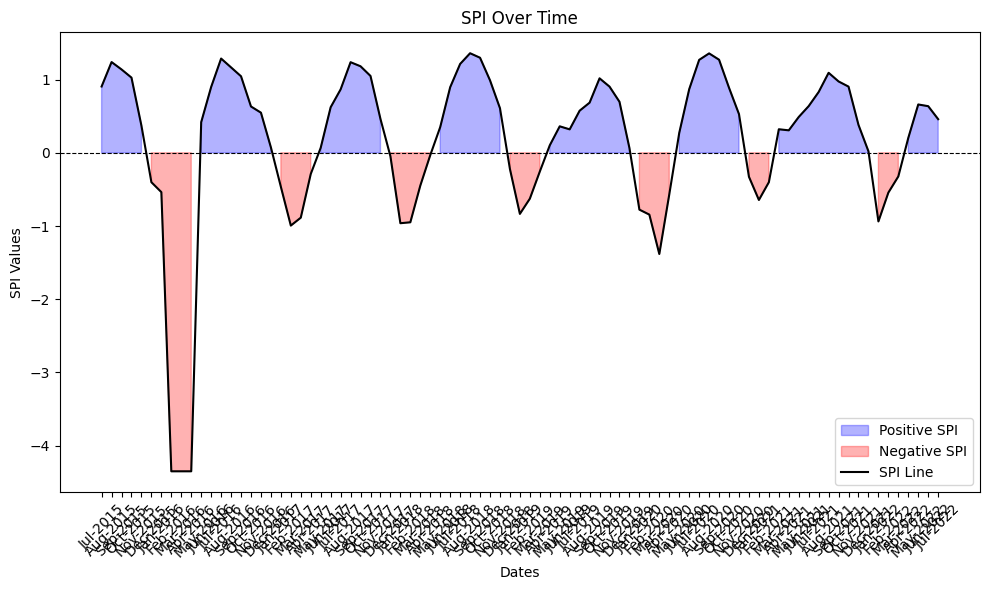

In [71]:
average_spi, spi_df, drought_freq = func('Hasimara.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Kheronighat

Average SPI value from Apr-2016 to Apr-2022: 0.47


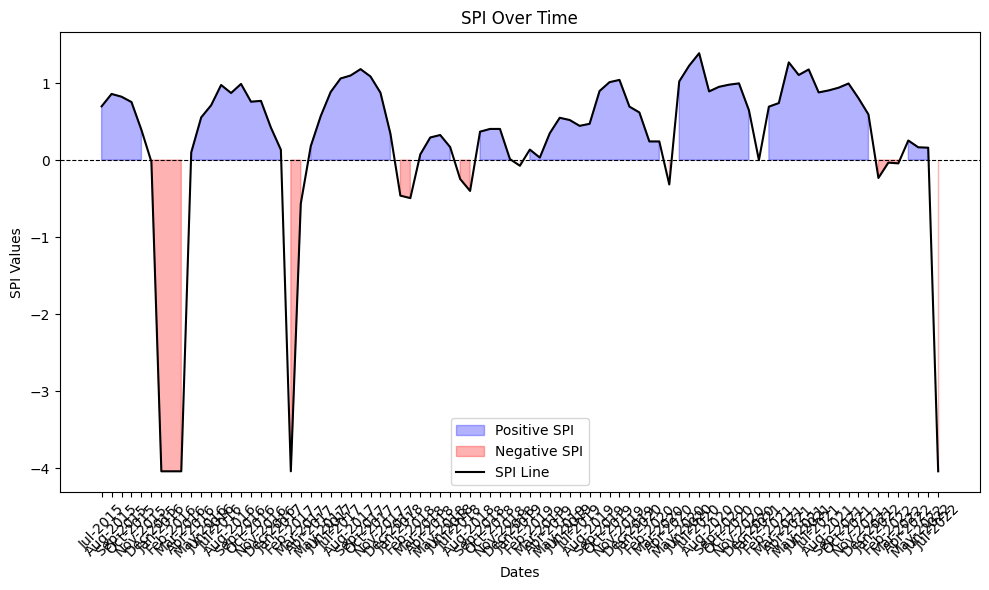

In [72]:
average_spi, spi_df, drought_freq = func('Kheronighat.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Kibithu

Average SPI value from Apr-2016 to Apr-2022: 0.36


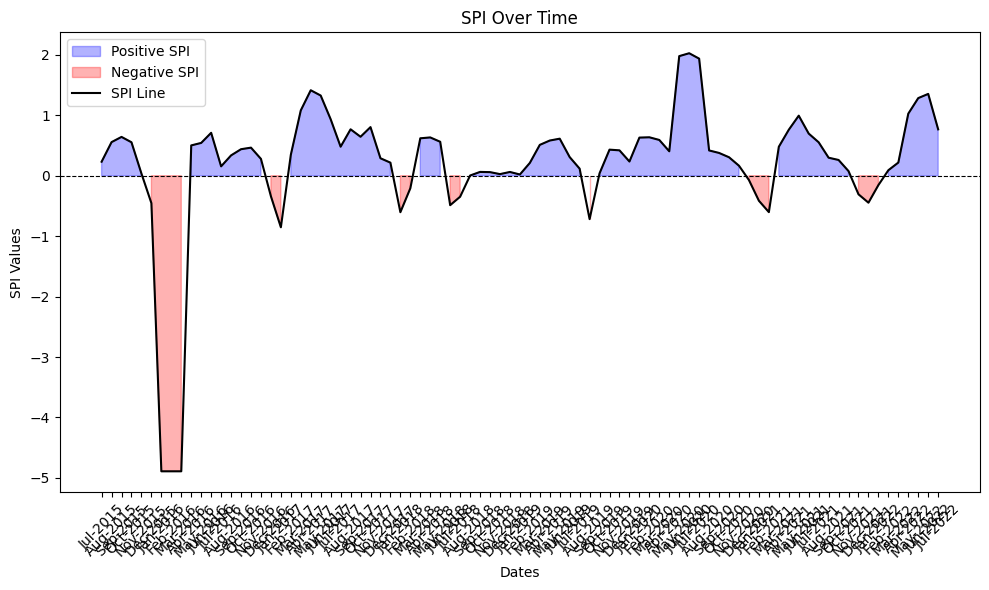

In [73]:
average_spi, spi_df, drought_freq = func('Kibithu.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# ManasNHCrossing

Average SPI value from Apr-2016 to Apr-2022: 0.29


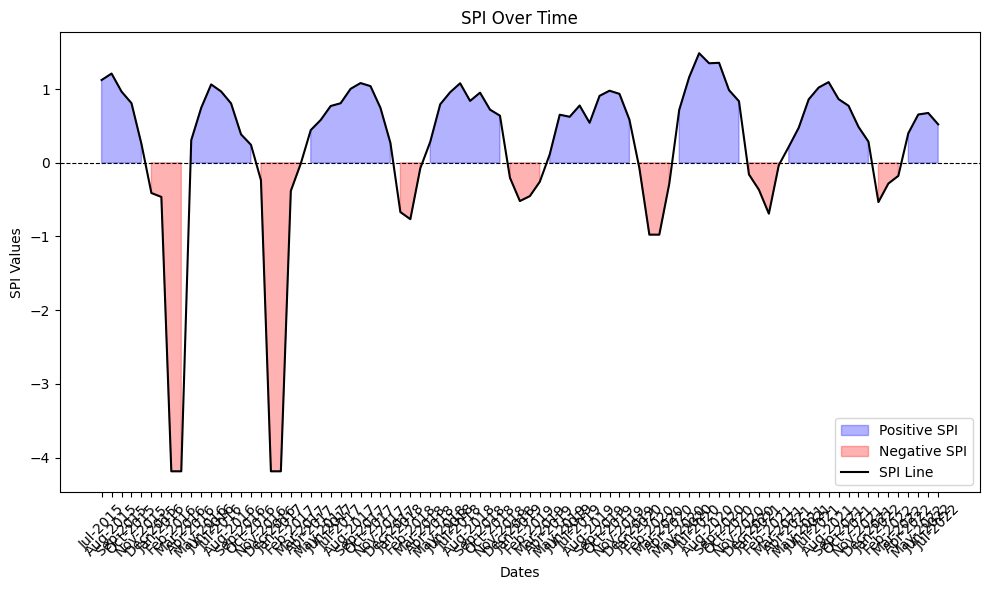

In [74]:
average_spi, spi_df, drought_freq = func('ManasNHCrossing.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Miao

Average SPI value from Apr-2016 to Apr-2022: 0.33


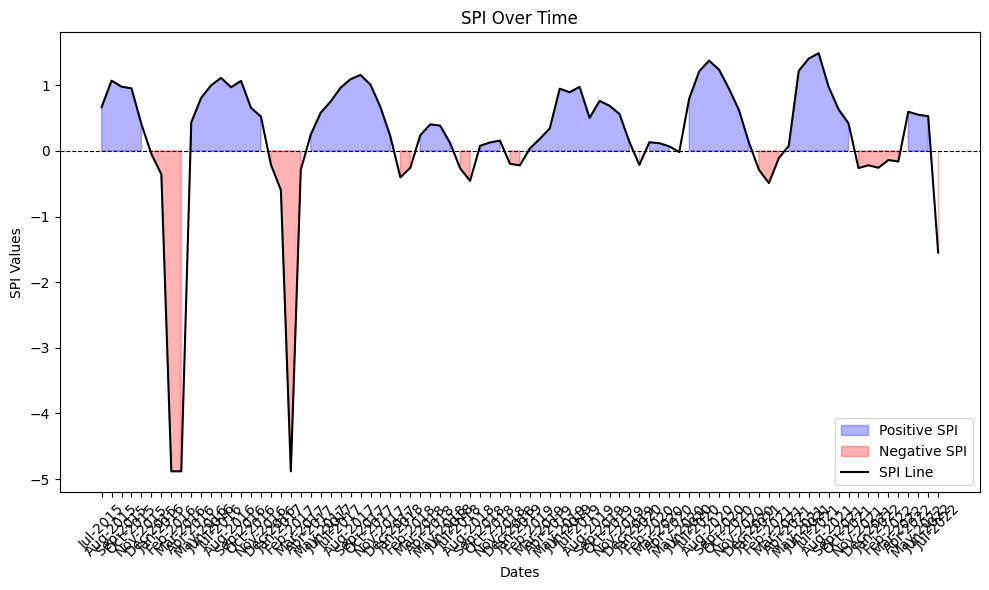

In [75]:
average_spi, spi_df, drought_freq = func('Miao.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Nagarkata

Average SPI value from Apr-2016 to Apr-2022: 0.32


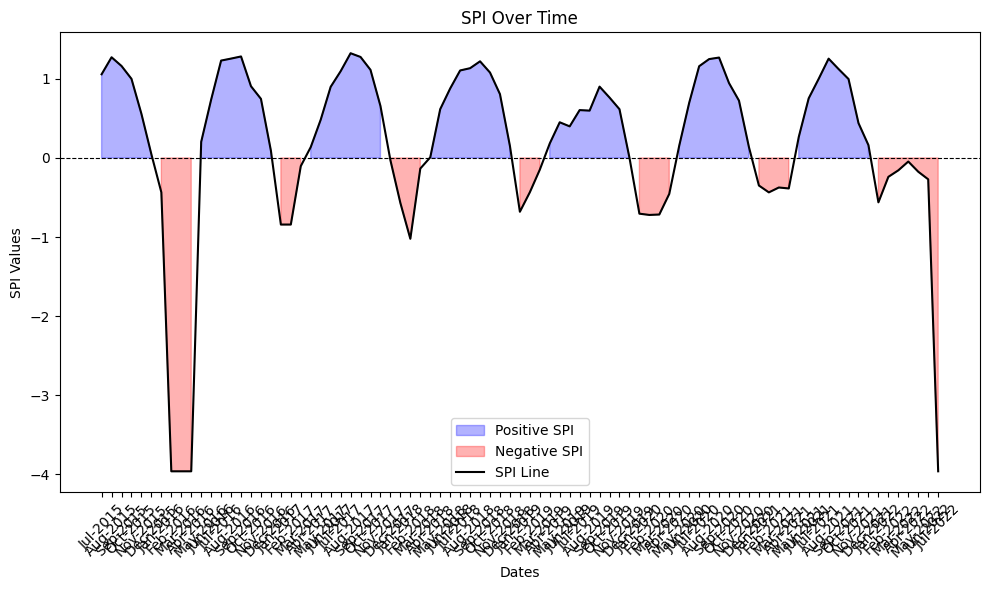

In [76]:
average_spi, spi_df, drought_freq = func('Nagarkata.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Numaligarh

Average SPI value from Apr-2016 to Apr-2022: 0.45


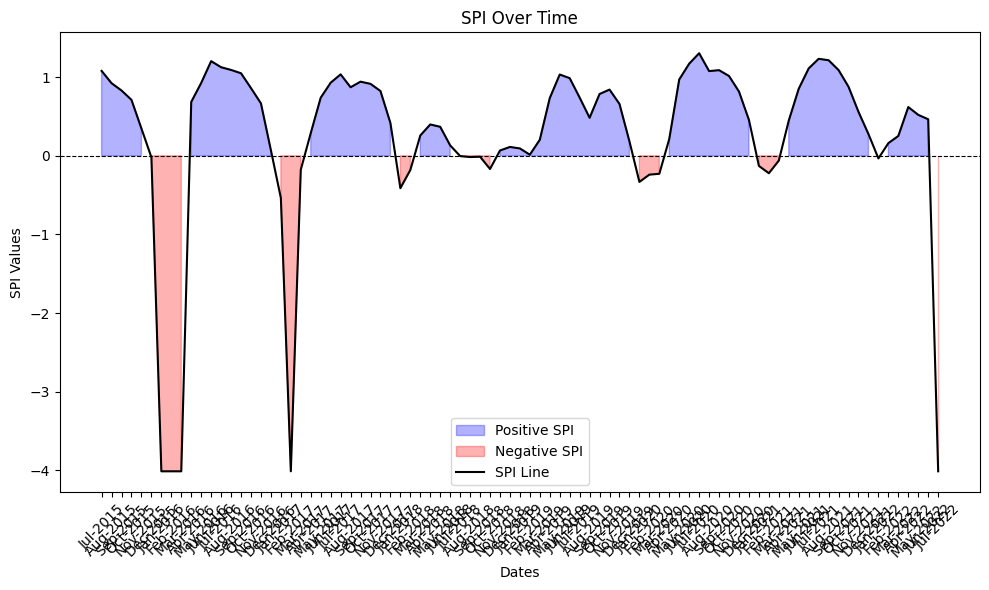

In [77]:
average_spi, spi_df, drought_freq = func('Numaligarh.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Rimbi

Average SPI value from Apr-2016 to Apr-2022: 0.26


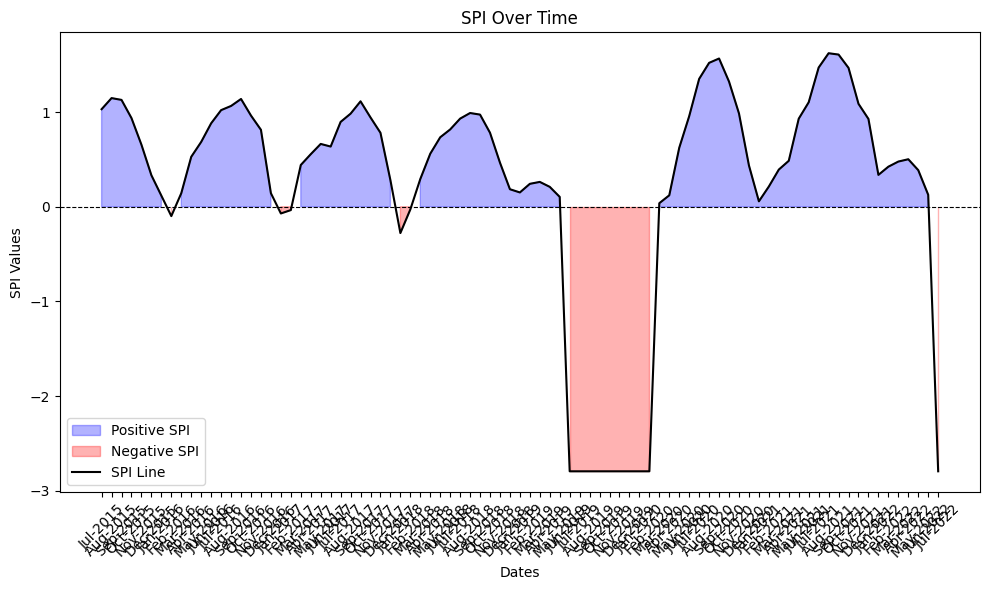

In [78]:
average_spi, spi_df, drought_freq = func('Rimbi.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Sankalang

Average SPI value from Apr-2016 to Apr-2022: -0.04


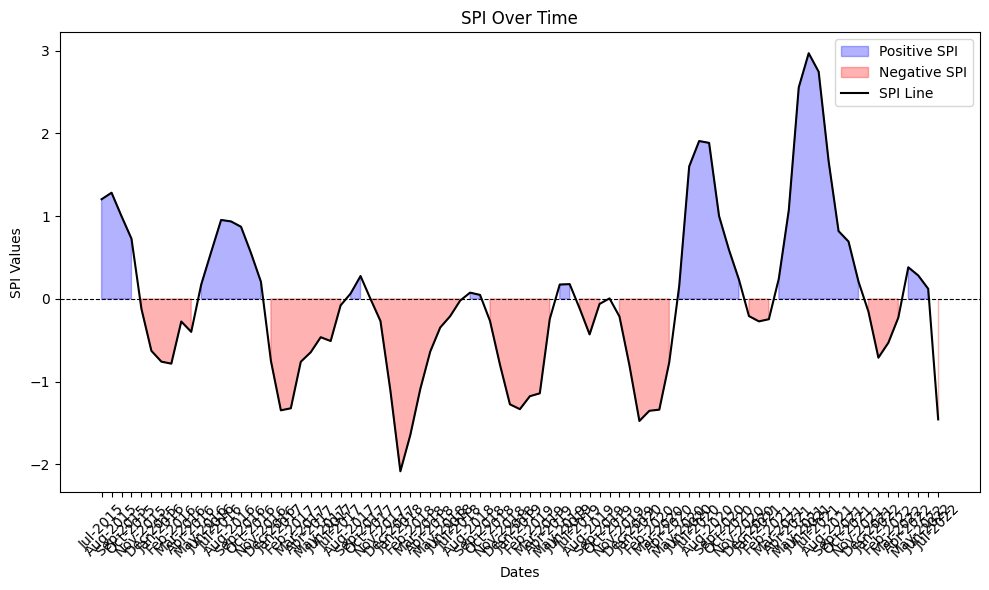

In [79]:
average_spi, spi_df, drought_freq = func('Sankalang.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

# Tuting

Average SPI value from Apr-2016 to Apr-2022: 0.41


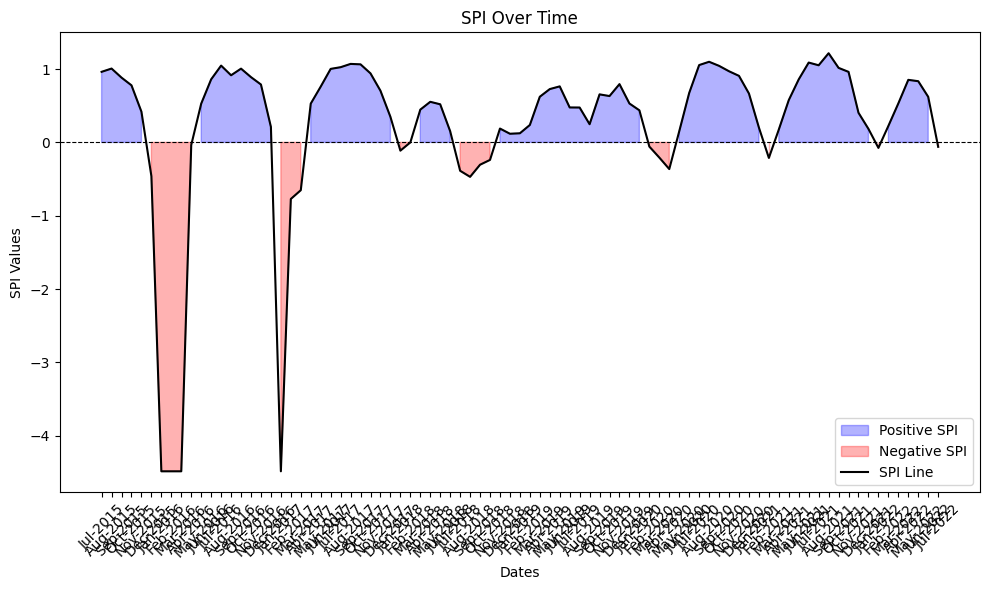

In [80]:
average_spi, spi_df, drought_freq = func('Tuting.csv', SPI_Type=SPI_Type, start_date=start_date, end_date=end_date)

average_spi_values.append(average_spi)
drought_frequencies.append(drought_freq)

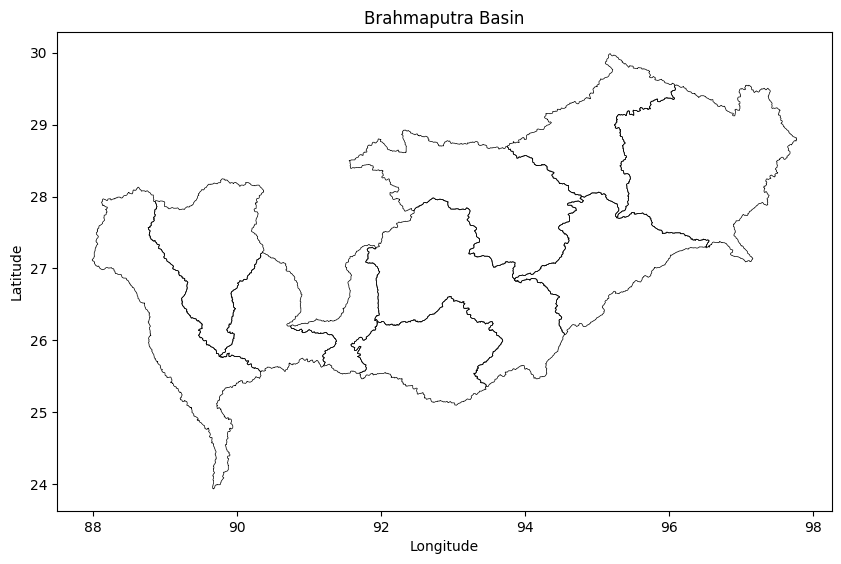

In [81]:
shapefile_path = './Shapefile/Brahmaputra.shp'
cauvery_basin = gpd.read_file(shapefile_path)

# cauvery_basin.plot()
# plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('white')  # Set background color to white
cauvery_basin.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
plt.title('Brahmaputra Basin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [82]:
lats = [26.3183, 27.0144, 26.0167, 26.0161, 27.4475, 26.1662, 26.0167, 27.4989, 26.5628, 26.8000, 26.7292, 25.8483, 28.2572, 26.4642, 27.4869, 26.8706, 26.6312, 27.3149, 27.5123, 28.9906]
longs = [90.4689, 92.6497, 89.9903, 93.7872, 94.252, 92.3554, 89.9903, 94.8558, 88.7617, 91.7000, 89.3272, 92.8883, 97.0258, 90.7489, 96.2094, 88.8956, 93.7304, 88.1876, 88.5289, 94.8950]

In [83]:
drought_frequencies = np.array(drought_frequencies, dtype=float)
average_spi_values

[0.2698095083105154,
 0.3909792692193962,
 0.43299396999808504,
 0.44764231021093814,
 0.15062266704867008,
 0.36270800094666195,
 0.3054217773582172,
 0.39768674197002696,
 0.34989573282927217,
 0.21030995065085545,
 0.24009530822370242,
 0.47122749968803546,
 0.36499499151480114,
 0.2943443483515475,
 0.3327015168503086,
 0.32071287516180746,
 0.448761798359909,
 0.2567706299056838,
 -0.04060732136439852,
 0.41046201361555174]

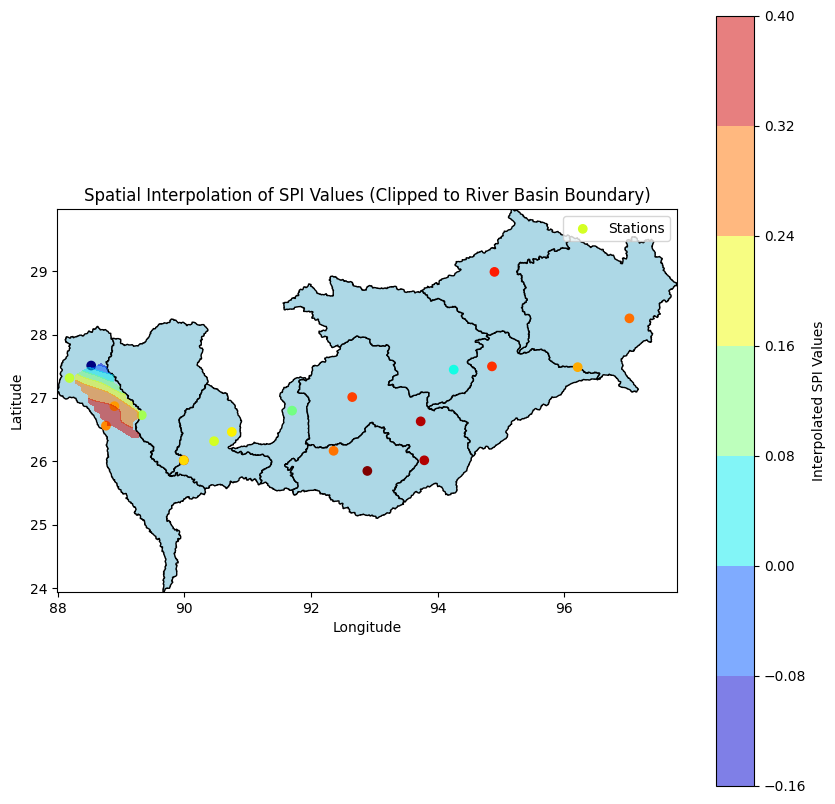

In [84]:
river_basin = gpd.read_file('Shapefile/Brahmaputra.shp')

station_data = {
    'Frequency': drought_frequencies,
    'SPI': average_spi_values,
    'Longitude': longs,
    'Latitude': lats,
}
# 3. Plot the river basin
fig, ax = plt.subplots(figsize=(10, 10))
river_basin.plot(ax=ax, color='lightblue', edgecolor='black')

# 4. Plot the stations
ax.scatter(station_data['Longitude'], station_data['Latitude'], c=station_data['SPI'], cmap='jet', label='Stations')
# plt.colorbar(ax.scatter([], [], c=[], cmap='jet', label='SPI'), ax=ax, label='SPI Values')

# 5. Interpolate SPI values
# Define the grid over which to interpolate SPI values
x_grid = np.linspace(river_basin.bounds.minx.min(), river_basin.bounds.maxx.max(), 100)
y_grid = np.linspace(river_basin.bounds.miny.min(), river_basin.bounds.maxy.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate SPI values using griddata
SPI_interpolated = griddata((station_data['Longitude'], station_data['Latitude']), 
                            station_data['SPI'], (X, Y), method='cubic')

# boundary_polygon = Polygon(river_basin.geometry.iloc[0].exterior)

# # Mask the interpolated SPI values outside the boundary
boundary_polygon = Polygon(river_basin.geometry.iloc[0].exterior)

# Clip the interpolated SPI values outside the boundary (brute force)
clipped_SPI = SPI_interpolated.copy()
for i in range(clipped_SPI.shape[0]):
    for j in range(clipped_SPI.shape[1]):
        point = Point(X[i, j], Y[i, j])
        if not boundary_polygon.contains(point):
            clipped_SPI[i, j] = np.nan

# Plot the clipped interpolated SPI values as a contour plot
contour = plt.contourf(X, Y, clipped_SPI, cmap='jet', alpha=0.5)
plt.colorbar(contour, ax=ax, label='Interpolated SPI Values')

plt.title('Spatial Interpolation of SPI Values (Clipped to River Basin Boundary)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
# # Plot the interpolated SPI values as a contour plot
# contour = plt.contourf(X, Y, SPI_interpolated, cmap='jet', alpha=0.5)
# plt.colorbar(contour, ax=ax, label='Interpolated SPI Values')

# plt.title('Spatial Interpolation of SPI Values')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend()
# plt.show()


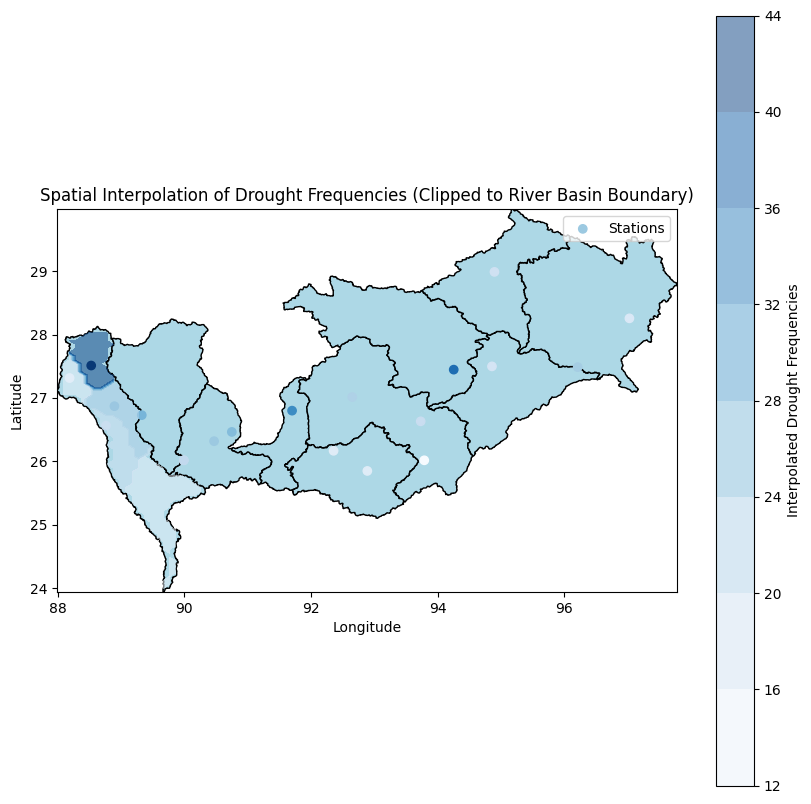

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))
river_basin.plot(ax=ax, color='lightblue', edgecolor='black')

# 4. Plot the stations
ax.scatter(station_data['Longitude'], station_data['Latitude'], c=station_data['Frequency'], cmap='Blues', label='Stations')
# plt.colorbar(ax.scatter([], [], c=[], cmap='jet', label='SPI'), ax=ax, label='SPI Values')

# 5. Interpolate SPI values
# Define the grid over which to interpolate SPI values
x_grid = np.linspace(river_basin.bounds.minx.min(), river_basin.bounds.maxx.max(), 100)
y_grid = np.linspace(river_basin.bounds.miny.min(), river_basin.bounds.maxy.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate SPI values using griddata
Freq_interpolated = griddata((station_data['Longitude'], station_data['Latitude']), 
                            station_data['Frequency'], (X, Y), method='nearest')

# boundary_polygon = Polygon(river_basin.geometry.iloc[0].exterior)

# # Mask the interpolated SPI values outside the boundary
boundary_polygon = Polygon(river_basin.geometry.iloc[0].exterior)

# Clip the interpolated SPI values outside the boundary (brute force)
clipped_Freq = Freq_interpolated.copy()
for i in range(clipped_Freq.shape[0]):
    for j in range(clipped_Freq.shape[1]):
        point = Point(X[i, j], Y[i, j])
        if not boundary_polygon.contains(point):
            clipped_Freq[i, j] = np.nan

# Plot the clipped interpolated SPI values as a contour plot
contour = plt.contourf(X, Y, clipped_Freq, cmap='Blues', alpha=0.5)
plt.colorbar(contour, ax=ax, label='Interpolated Drought Frequencies')

plt.title('Spatial Interpolation of Drought Frequencies (Clipped to River Basin Boundary)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [86]:
cnt = 0
dro = 0
for i in range(clipped_SPI.shape[0]):
    for j in range(clipped_SPI.shape[1]):
        if (np.isnan(clipped_SPI[i][j])) == False:
            cnt += 1
            if(clipped_SPI[i][j] < 0):
                dro += 1
# print(dro)
# print(cnt)
print("Percentage of areal extent of drought: ", (dro/cnt)*100)
            

Percentage of areal extent of drought:  4.3478260869565215


After using the above code for various inputs, we get
- Areal Extent of Drought for 2016 - 74.73179639351746 %
- Areal Extent of Drought for 2017 - 14.882446929924676 %
- Areal Extent of Drought for 2018 - 1.1869436201780417 %
- Areal Extent of Drought for 2019 - 8.148824469299248 %
- Areal Extent of Drought for 2020 - 18.717187856653734 %
- Areal Extent of Drought for 2021 - 0.0 %

Using SPI-1






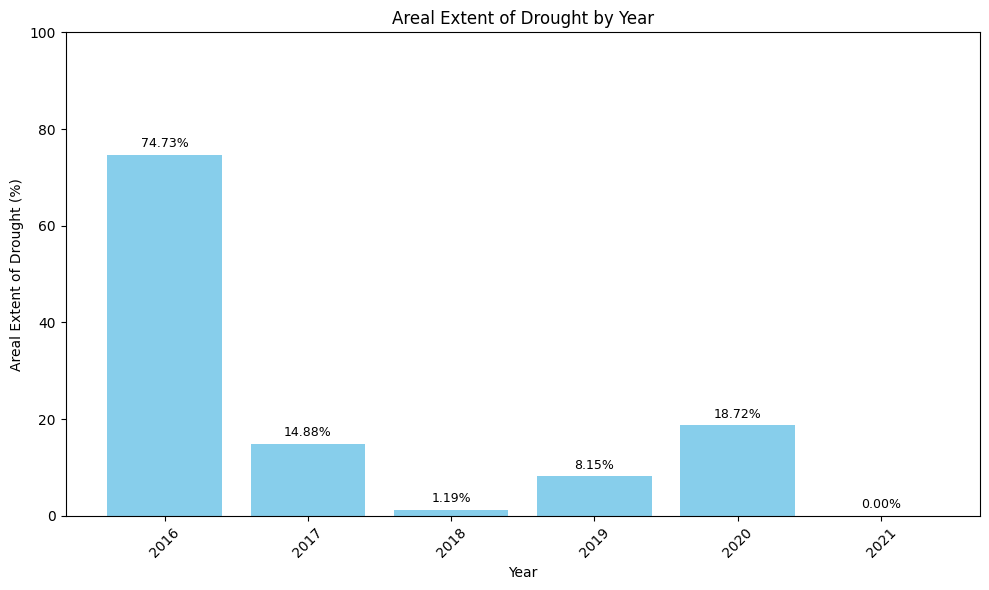

In [87]:
years = ['2016', '2017', '2018', '2019', '2020', '2021']
areal_extent = [74.73179639351746, 14.882446929924676, 1.1869436201780417, 8.148824469299248, 18.717187856653734, 0.0]

plt.figure(figsize=(10, 6))
plt.bar(years, areal_extent, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Areal Extent of Drought (%)')
plt.title('Areal Extent of Drought by Year')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
for i, val in enumerate(areal_extent):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', va='bottom', fontsize=9)  # Add text labels
plt.tight_layout()
plt.show()